In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [56]:
df = pd.read_csv('./march18_myspeed_internet.csv')
df.head()

,Service Provider,Technology,Test_type,Data Speed(Mbps),Signal_strength,LSA
0,JIO,4G,Upload,7.30,-63,Andhra Pradesh
1,JIO,4G,Upload,7.31,-65,Andhra Pradesh
2,JIO,4G,Upload,6.91,-65,Andhra Pradesh
3,VODAFONE,4G,Download,7.73,-90,Maharashtra
4,VODAFONE,4G,Download,6.92,-90,Maharashtra


In [57]:
df1 = df.isnull().sum()
df1

Service Provider    0
Technology          0
Test_type           0
Data Speed(Mbps)    0
Signal_strength     0
LSA                 0
dtype: int64

In [58]:
df.shape

(1322972, 6)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322972 entries, 0 to 1322971
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Service Provider  1322972 non-null  object 
 1   Technology        1322972 non-null  object 
 2   Test_type         1322972 non-null  object 
 3   Data Speed(Mbps)  1322972 non-null  float64
 4   Signal_strength   1322972 non-null  object 
 5   LSA               1322972 non-null  object 
dtypes: float64(1), object(5)
memory usage: 60.6+ MB


In [60]:
df = df.groupby(['Service Provider', 'LSA', 'Test_type'], as_index= False )['Data Speed(Mbps)'].mean()
df

,Service Provider,LSA,Test_type,Data Speed(Mbps)
0,AIRCEL,Andhra Pradesh,Download,5.550000
1,AIRCEL,Andhra Pradesh,Upload,4.316667
2,AIRCEL,Assam,Download,2.870000
3,AIRCEL,Assam,Upload,1.980000
4,AIRCEL,Chennai,Download,2.880000
...,...,...,...,...
225,VODAFONE,UP East,Upload,3.438921
226,VODAFONE,UP West,Download,2.381655
227,VODAFONE,UP West,Upload,3.027841
228,VODAFONE,West Bengal,Download,5.866910


In [61]:
df.shape

(230, 4)

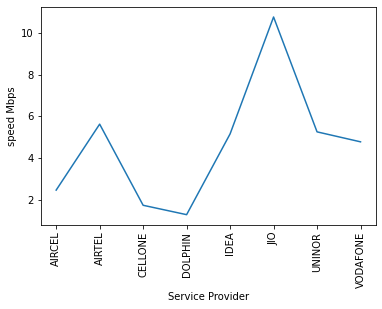

In [62]:
#Service provider with highest internet speed
results = df.groupby('Service Provider').mean()
provider = df['Service Provider'].unique()
plt.plot(provider, results['Data Speed(Mbps)'])
plt.xticks(provider, rotation ='vertical')
plt.ylabel('speed Mbps')
plt.xlabel('Service Provider')
plt.show()

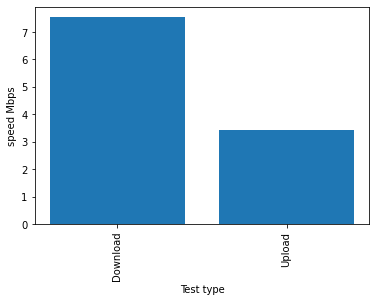

In [63]:
# average upload and download speed
state = df.groupby('Test_type').mean()
provider = df['Test_type'].unique()
plt.bar(provider, state['Data Speed(Mbps)'])
plt.xticks(provider, rotation ='vertical')
plt.ylabel('speed Mbps')
plt.xlabel('Test type')
plt.show()

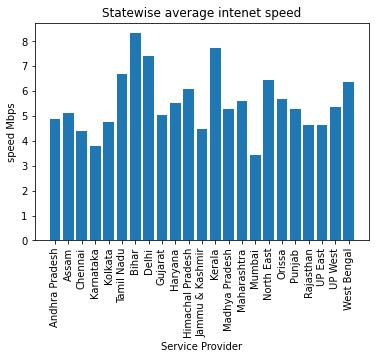

In [65]:
# Statewise Internet speed 
state = df.groupby('LSA').mean()
provider = df['LSA'].unique()
plt.bar(provider, state['Data Speed(Mbps)'])
plt.xticks(provider, rotation ='vertical')
plt.ylabel('speed Mbps')
plt.xlabel('Service Provider')
plt.title('Statewise average intenet speed')
plt.show()

In [52]:
# Top 10 States with highest internet speed
df.groupby('LSA').agg({'Data Speed(Mbps)': 'max'})['Data Speed(Mbps)'].nlargest(10)

LSA
Haryana             35.288360
Himachal Pradesh    31.459570
Karnataka           27.568220
UP West             23.048286
Madhya Pradesh      22.762205
Andhra Pradesh      20.599213
Kerala              20.201955
Mumbai              19.996395
Assam               19.781733
Orissa              19.348257
Name: Data Speed(Mbps), dtype: float64

In [54]:
# Top 5 providers with highest internet speed
df.groupby('Service Provider').agg({'Data Speed(Mbps)': 'max'})['Data Speed(Mbps)'].nlargest(5)

Service Provider
JIO         35.288360
IDEA        14.430581
AIRTEL      11.965789
VODAFONE     9.623424
UNINOR       7.320400
Name: Data Speed(Mbps), dtype: float64